In [4]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp39-cp39-macosx_10_13_x86_64.whl (8.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
conda install -c conda-forge xgboost

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::scikit-learn==0.24.2=py39hb2f4e1b_0
  - defaults/noarch::cookiecutter==1.7.2=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/noarch::jinja2==2.11.3=pyhd3eb1b0_0
  - defaults/osx-64::distributed==2021.10.0=py39hecd8cb5_0
  - defaults/osx-64::notebook==6.4.5=py39hecd8cb5_0
  - defaults/noarch::sphinx==4.2.0=pyhd3eb1b0_1
  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/osx-64::scikit-learn-intelex==2021.3.0=py39hecd8cb5_0
  - defaults/noarch::jinja2-time==0.2.0=pyhd3eb1b0_2
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py

In [8]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/SBI_Life_insurance.csv")

In [13]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [14]:
pd.set_option('display.max_columns',None)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [16]:
df.nunique().to_frame("Unique Values")

,Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337
insuranceclaim,2


In [17]:
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [18]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [19]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


<AxesSubplot:>

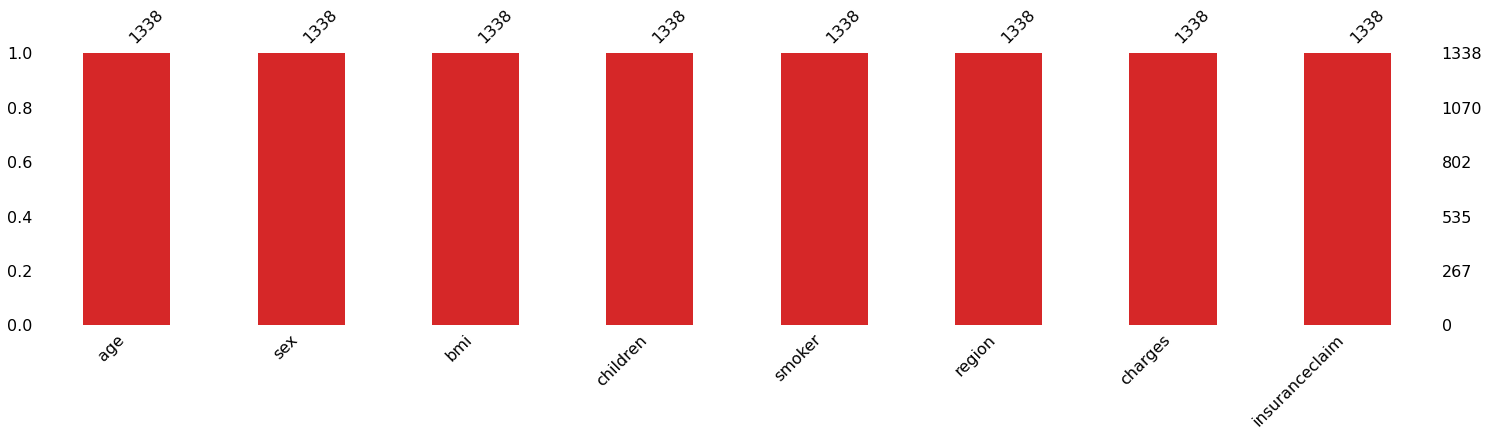

In [20]:
import missingno
missingno.bar(df, figsize=(25,5), color="tab:red")

In [21]:
print(f"Rows and Columns before dropping duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df.shape)

Rows and Columns before dropping duplicates: (1338, 8)
Rows and Columns after dropping duplicates: (1337, 8)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1337 non-null   int64  
 1   sex             1337 non-null   int64  
 2   bmi             1337 non-null   float64
 3   children        1337 non-null   int64  
 4   smoker          1337 non-null   int64  
 5   region          1337 non-null   int64  
 6   charges         1337 non-null   float64
 7   insuranceclaim  1337 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 94.0 KB


In [23]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487,0.584892
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656,0.492925
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300,1.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


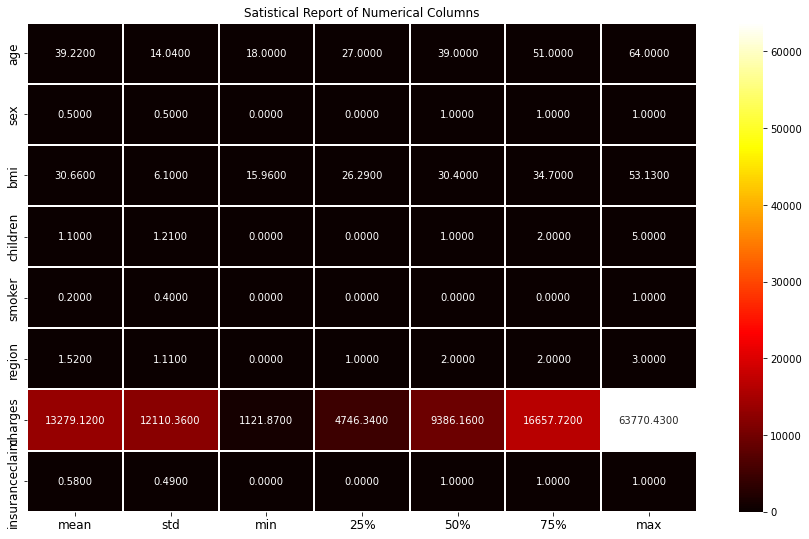

In [24]:
plt.figure(figsize=(15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".4f",cmap="hot")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

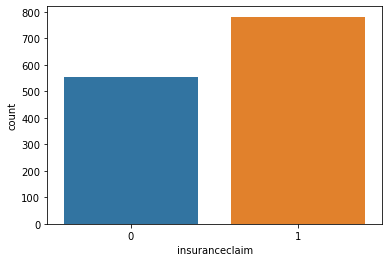

In [25]:
sns.countplot(x="insuranceclaim",data=df)
plt.show()

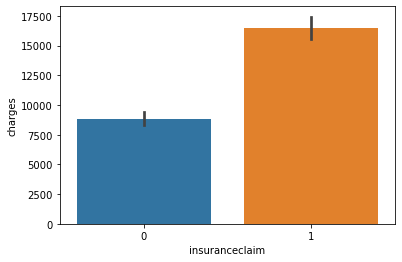

In [26]:
#Lets compare the average charges who claimed with average charges wh didnt
sns.barplot(x="insuranceclaim",y="charges",data=df)
plt.show()

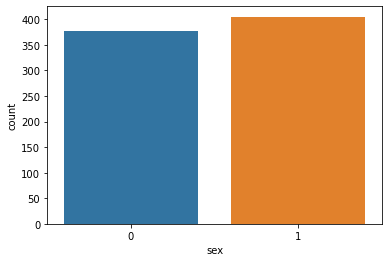

In [27]:
#lets chcek count male and female among who claimed insurance
sns.countplot(x="sex",data=df.loc[df["insuranceclaim"]==1])
plt.show()
#Almost equal number males and females are there who claimed insurance

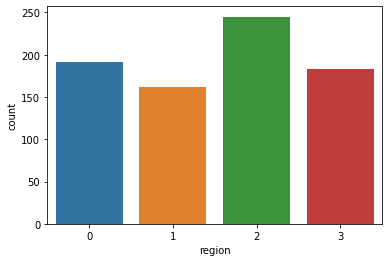

In [28]:
#Lets chcek higher number of claims are from which region
sns.countplot(x="region",data=df.loc[df["insuranceclaim"]==1])
plt.show()
#highest number of claims are from region 2

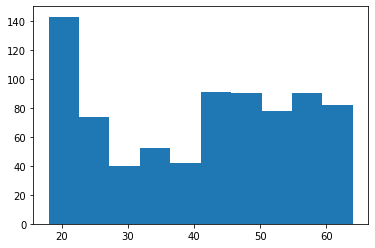

In [30]:
#we will chcek in which age interval claims are high
plt.hist(x="age",data=df.loc[df["insuranceclaim"]==1])
plt.show()

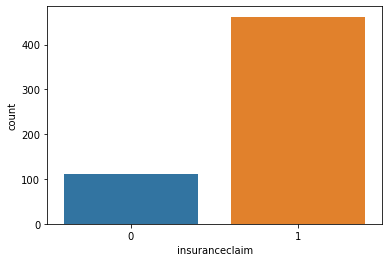

In [31]:
#lets chcek claims made by person not having the children
sns.countplot(x="insuranceclaim",data=df.loc[df["children"]==0])
plt.show()
#here claims made are far higher than non -claimers i.e more than 4 times

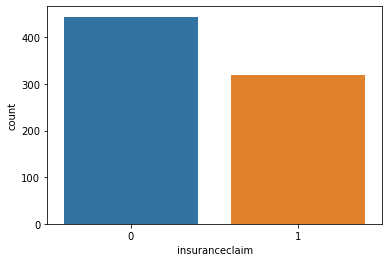

In [32]:
#lets chcek claims made by person not having children
sns.countplot(x="insuranceclaim",data=df.loc[df["children"]!=0])
plt.show()

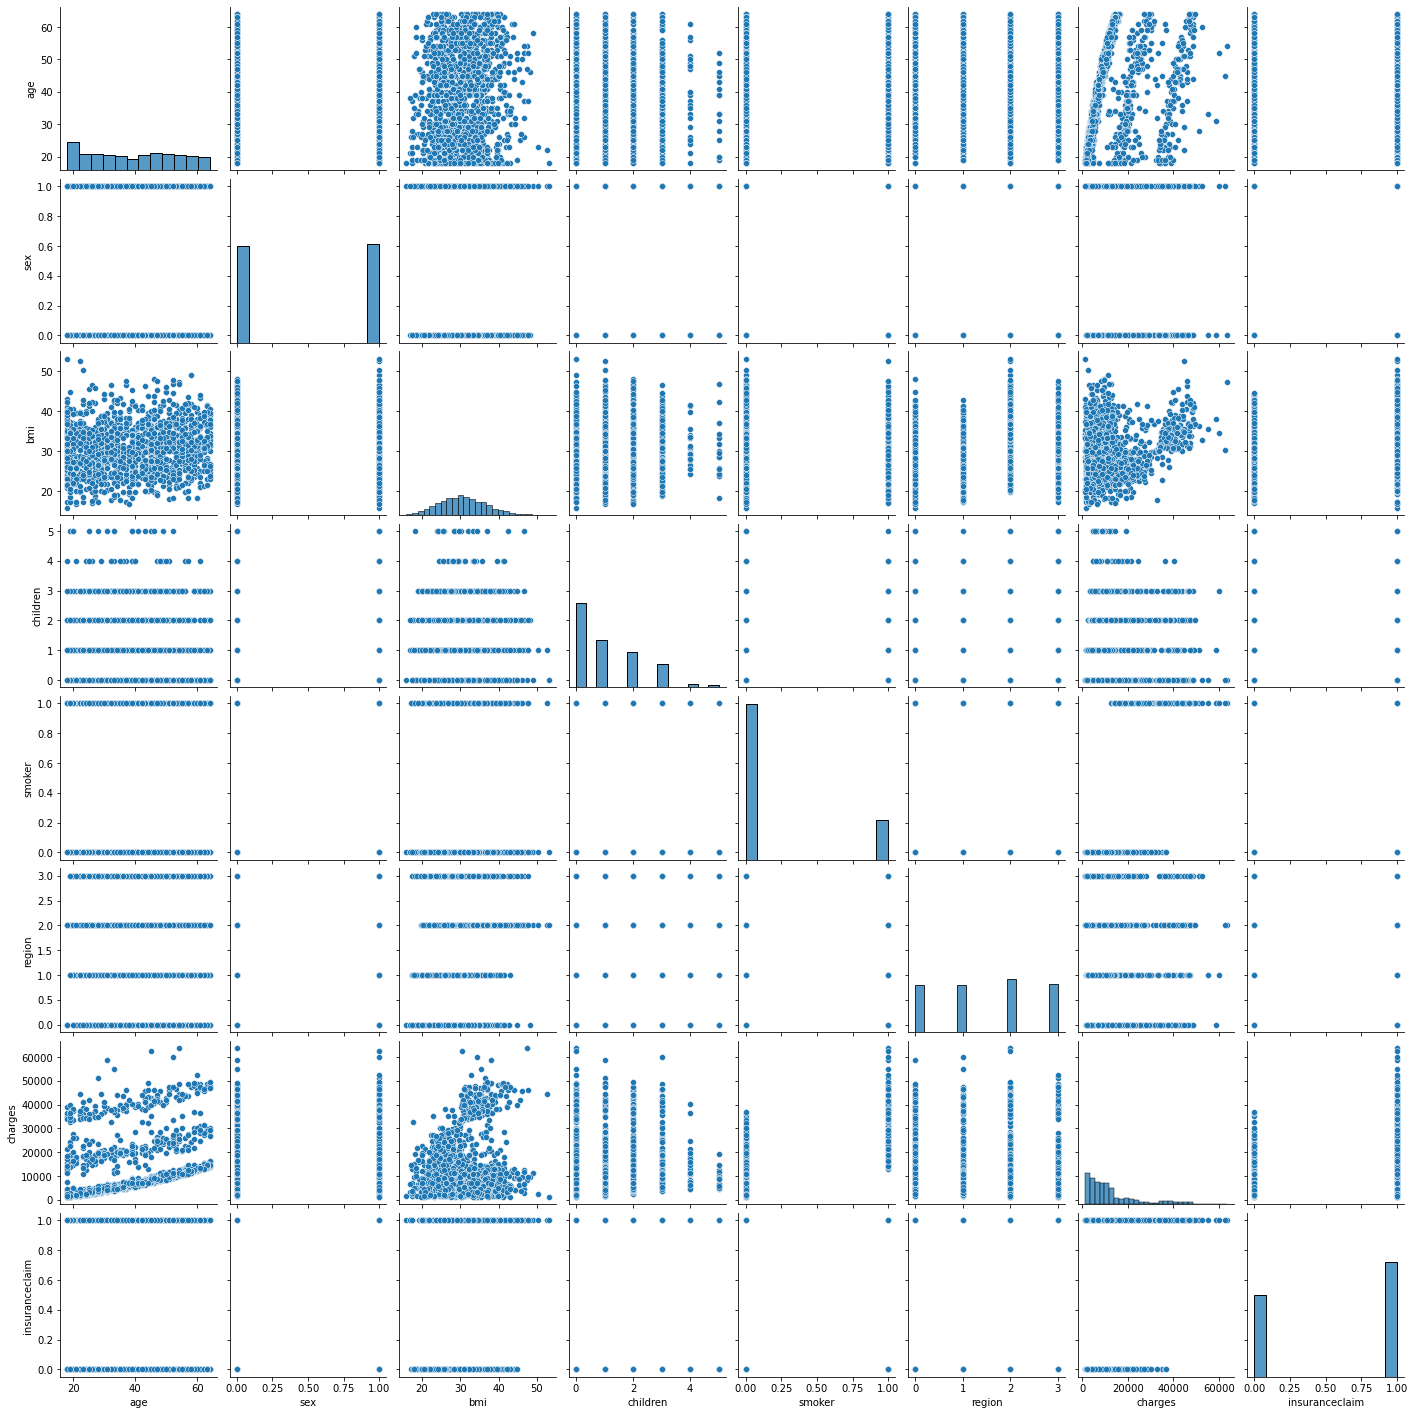

In [33]:
#Lets make pairplot
sns.pairplot(df)
plt.show()

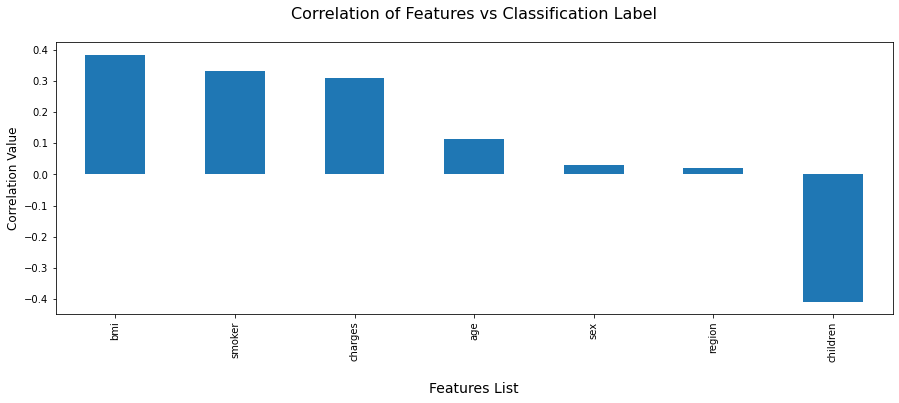

In [35]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['insuranceclaim'].sort_values(ascending=False).drop('insuranceclaim').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [36]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe after removing outliers",df1.shape)
print("Percentage of data loss post outliers removal", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers (1337, 8)
Shape of the dataframe after removing outliers (1308, 8)
Percentage of data loss post outliers removal 2.169035153328347


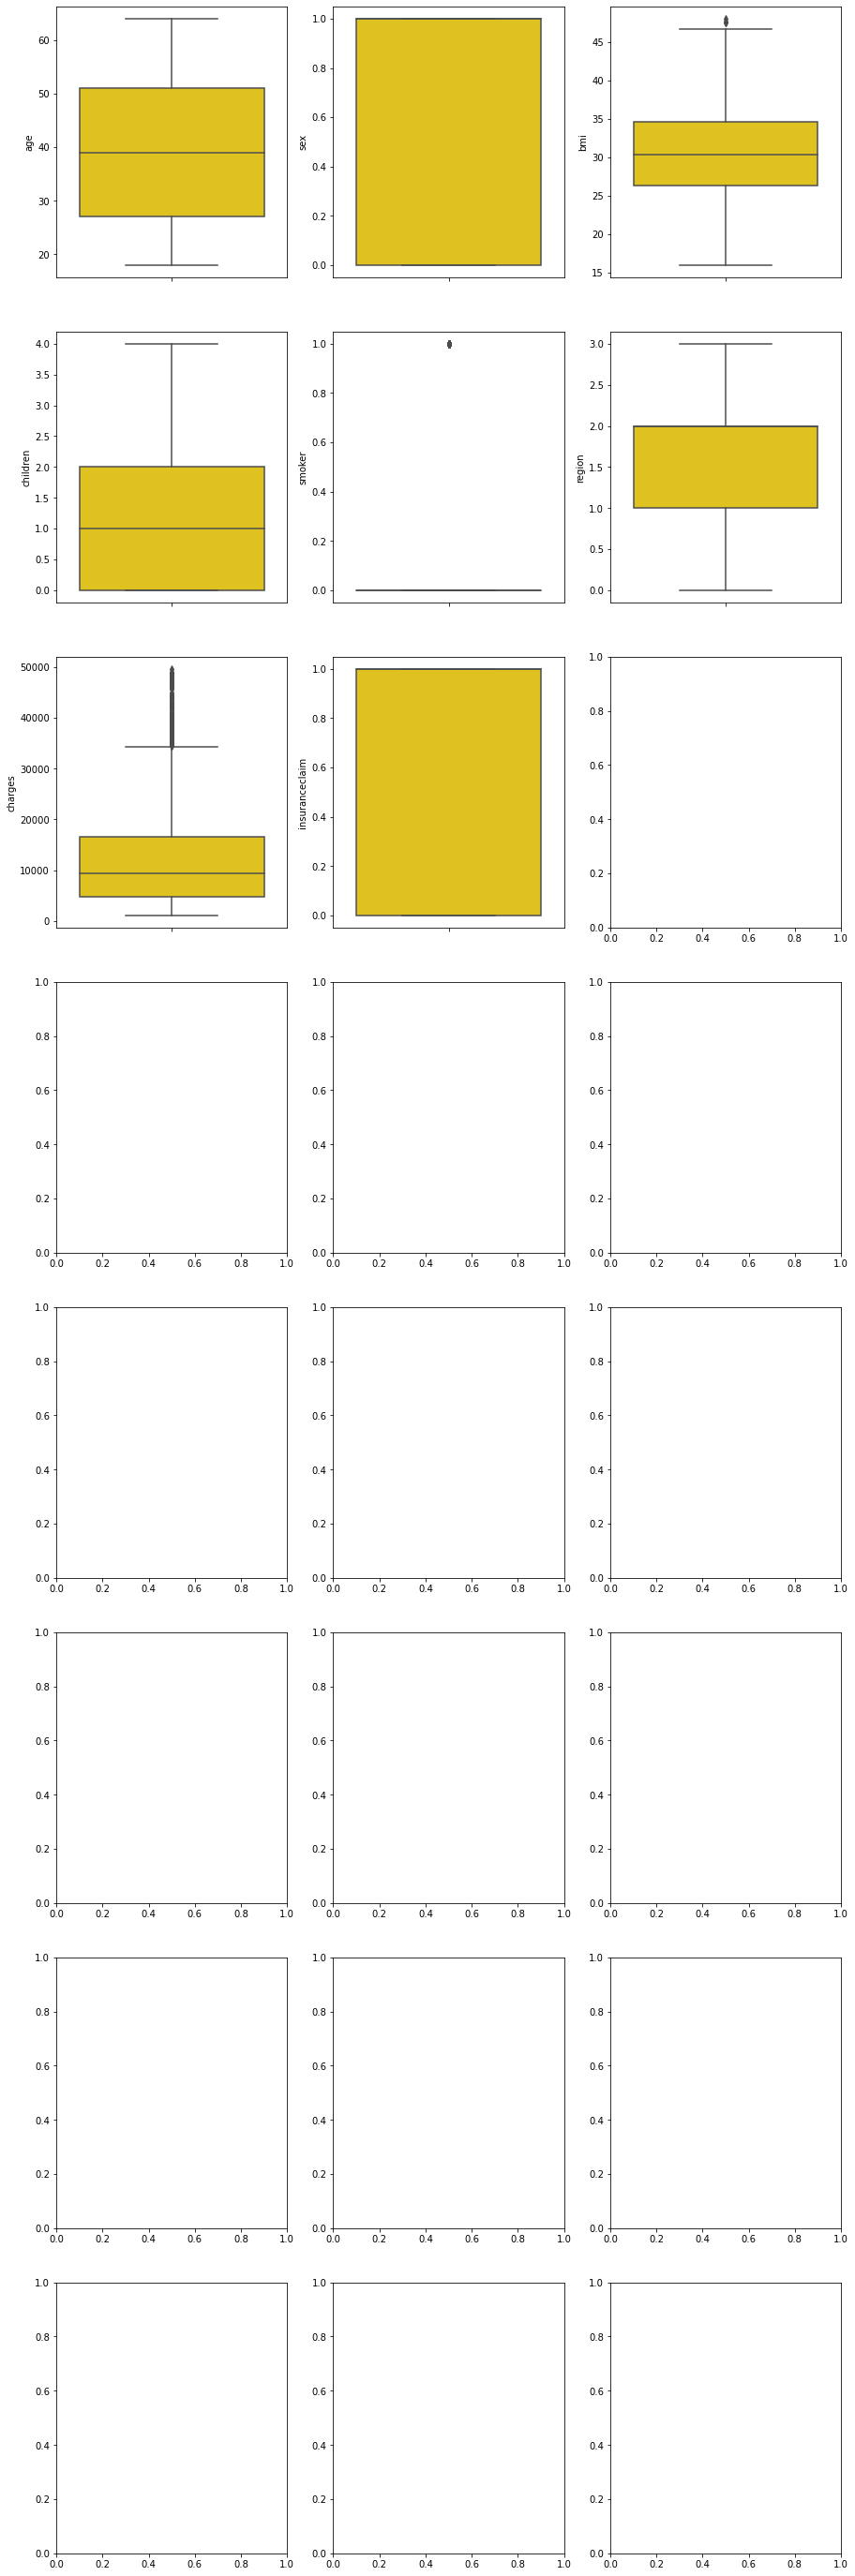

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.show()

In [39]:
df.skew()

age               0.050421
sex              -0.009185
bmi               0.191361
children          0.737050
smoker            1.481539
region           -0.024001
charges           1.436653
insuranceclaim   -0.351245
dtype: float64

In [41]:
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

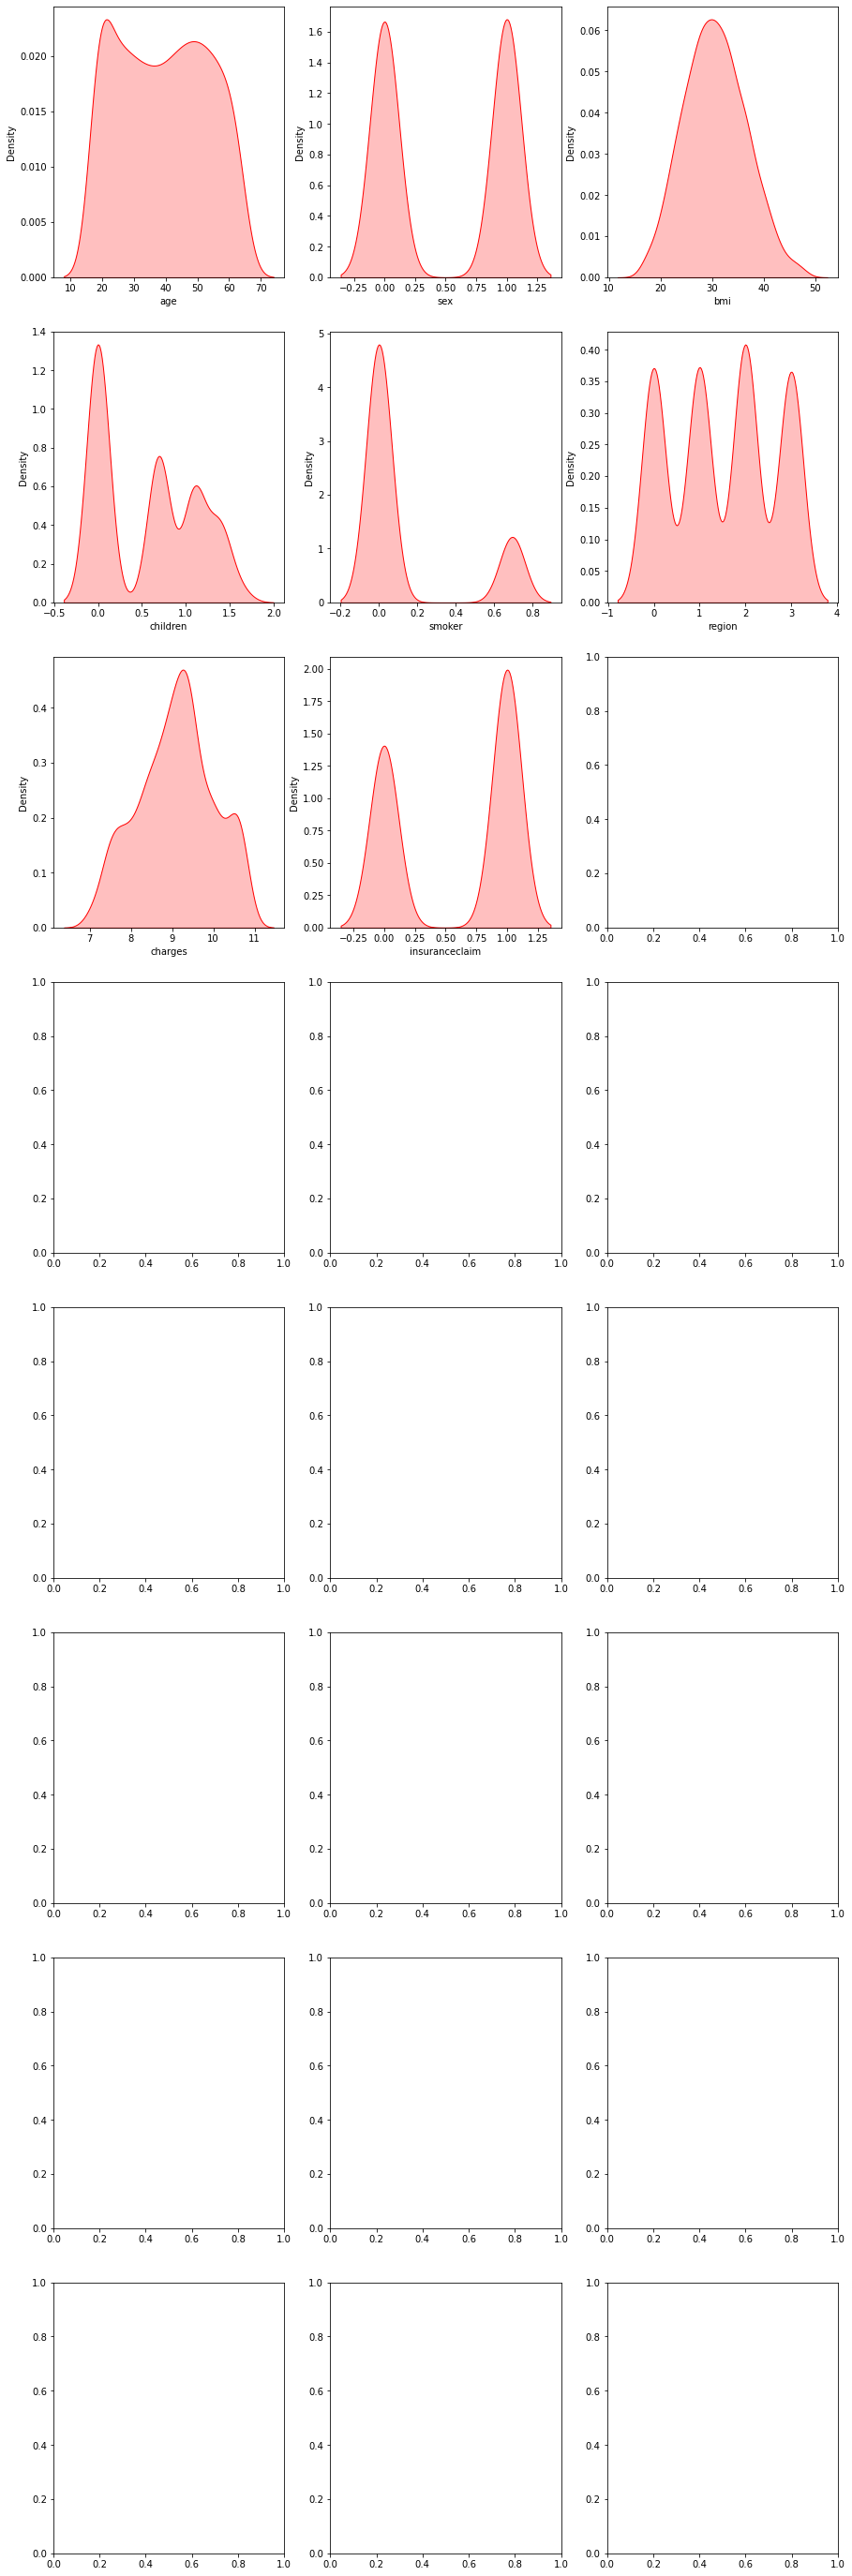

In [42]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade":True})
    index += 1
plt.show() 

In [43]:
X = df.drop('insuranceclaim', axis=1)
Y = df['insuranceclaim']

In [44]:
Y.value_counts()

1    767
0    541
Name: insuranceclaim, dtype: int64

In [45]:
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [46]:
Y.value_counts()

1    767
0    767
Name: insuranceclaim, dtype: int64

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.443791,-0.935578,-0.388570,-1.118972,2.158238,1.420027,0.772394
1,-1.515941,1.068858,0.587959,0.155280,-0.467573,0.506685,-1.813841
2,-0.794445,1.068858,0.459862,1.429532,-0.467573,0.506685,-0.739947
3,-0.433697,1.068858,-1.252806,-1.118972,-0.467573,-0.406658,1.071694
4,-0.505847,1.068858,-0.225538,-1.118972,-0.467573,-0.406658,-0.899075


In [58]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 90.625 on Random State 174


In [59]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=174)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n",class_report)
    
    acc_score = (accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [60]:
#Logistic Regression

model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       199
           1       0.91      0.90      0.90       185

    accuracy                           0.91       384
   macro avg       0.91      0.91      0.91       384
weighted avg       0.91      0.91      0.91       384

Accuracy Score: 90.625
Cross Validation Score: 86.57107577015604

Accuracy Score - Cross Validation Score is 4.0539242298439575


In [61]:
#support vector classifier

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       199
           1       0.98      0.90      0.94       185

    accuracy                           0.94       384
   macro avg       0.94      0.94      0.94       384
weighted avg       0.94      0.94      0.94       384

Accuracy Score: 94.01041666666666
Cross Validation Score: 90.4174916437802

Accuracy Score - Cross Validation Score is 3.5929250228864618


In [62]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       199
           1       0.99      0.99      0.99       185

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384

Accuracy Score: 99.21875
Cross Validation Score: 97.84973707181027

Accuracy Score - Cross Validation Score is 1.3690129281897327


In [63]:
#RandomForestClassifier


model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       199
           1       0.97      0.96      0.97       185

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384

Accuracy Score: 96.875
Cross Validation Score: 95.30774307551468

Accuracy Score - Cross Validation Score is 1.5672569244853207


In [64]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       199
           1       0.89      0.89      0.89       185

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.89      0.89      0.89       384

Accuracy Score: 89.32291666666666
Cross Validation Score: 88.33280109003428

Accuracy Score - Cross Validation Score is 0.9901155766323768


In [65]:
#ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       199
           1       0.95      0.91      0.93       185

    accuracy                           0.93       384
   macro avg       0.94      0.93      0.93       384
weighted avg       0.94      0.93      0.93       384

Accuracy Score: 93.48958333333334
Cross Validation Score: 91.6567669413042

Accuracy Score - Cross Validation Score is 1.8328163920291445


In [66]:
#XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       199
           1       0.99      0.99      0.99       185

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384

Accuracy Score: 98.95833333333334
Cross Validation Score: 98.43605629005131

Accuracy Score - Cross Validation Score is 0.5222770432820312


In [67]:
fmod_param = {'criterion' : ["gini", "entropy"],
             'splitter':["best","random"],
             'min_samples_split':[2,3,4],
             'max_depth':[4,6,8],
             'random_state':[42,111,174] 
             }

In [68]:
GSCV = GridSearchCV(DecisionTreeClassifier(),fmod_param,cv=5)

In [70]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 174],
                         'splitter': ['best', 'random']})

In [71]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [72]:
GSCV.best_score_

0.9704347826086955

In [73]:
Final_Model = DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_split=2,
                                   random_state=42,splitter="best")
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score for the Best Model is:",fmod_acc)

Accuracy score for the Best Model is: 98.69791666666666


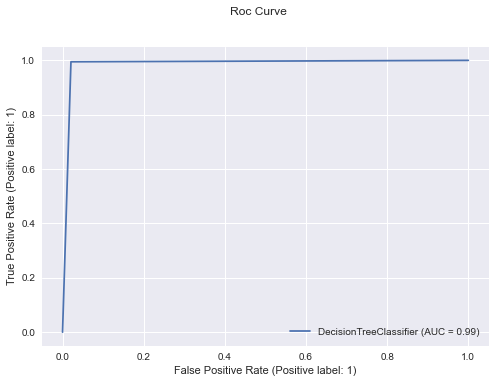

In [75]:
from sklearn import metrics
plt.style.use('seaborn')
disp=metrics.plot_roc_curve(Final_Model,X_test,Y_test)
disp.figure_.suptitle("Roc Curve")
plt.show()

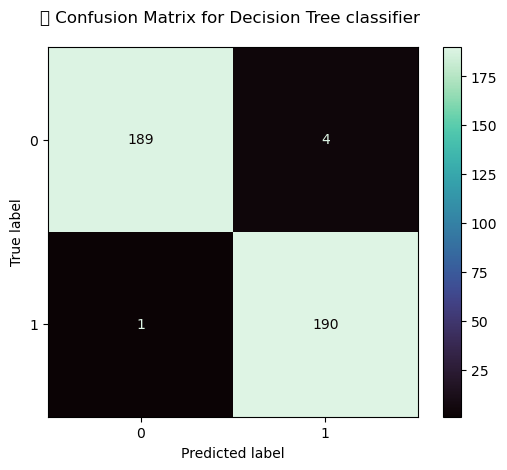

In [76]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree classifier \n')
plt.show()

In [77]:
filename = "FinalModel_E41.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E41.pkl']